### **Convolutional Neural Network**
- https://towardsdatascience.com/convolutional-neural-networks-explained-9cc5188c4939

#### Convolutional Neural Network Architecture
<div>
<img src = "nlp_images/cnn.png" width = 750>
</div>

#### Convolution Layer - Hidden Layers
- The convolution layer is a crucial component of a CNN, utilizing a small, learnable filter (kernel) that moves across an image to perform a dot product operation, capturing features like edges, colors, and textures. 
- This kernel is spatially smaller but extends through all the image's channels (e.g., RGB), allowing it to extract significant features by focusing on small portions of the image at a time.

    <div>
    <img src = "nlp_images/conv_layer1.png" width = 350>
    <img src = "nlp_images/convolution_layer2.png" width = 340>
    </div>

- Formula for Convolution Layer
    <div>
    <img src = "nlp_images/CL_Formula.png" width = 300>
    </div>

- Convolution Operation
    <div>
    <img src = "nlp_images/activationMap.png" width = 600>
    </div>

- Convolution leverages three important ideas that motivated computer vision researchers: sparse interaction, parameter sharing, and equivariant representation.
    - Sparse interactions mean that, unlike traditional networks where every output is connected to every input, CNNs use a smaller kernel to interact with parts of the input, like a patch of pixels in an image. This reduces memory needs and improves efficiency because it focuses only on meaningful local features.
    - Parameter sharing refers to using the same weights across different positions in the input, meaning if detecting a feature is useful at one point, it's also applied at another. This consistency saves on the number of parameters and computations needed.
    - Equivariant representations mean that if the input shifts, the output shifts in the same way. Due to parameter sharing, if something moves in the input image, its representation changes correspondingly in the output, making CNNs effective at recognizing patterns no matter where they appear in the image.

#### Non-Linearity Layers (ReLU) - Hidden Layers

- Since convolution is a linear operation and images are far from linear, non-linearity layers are often placed directly after the convolutional layer to introduce non-linearity to the activation map. There are several types of non-linear operations, Sigmoid, Tanh, and ReLU
- Sigmoid and Tanh functions exhibit a characteristic where, for very high or low input values, their gradients approach very close to zero. This implies that when the input values are significantly large or small, the change in the output of these functions becomes minimal, leading to almost no updates in the weights during the learning process. This phenomenon is known as saturation.
- On the other hand, the Rectified Linear Unit (ReLU) function outputs the input value directly if it is greater than zero, and outputs zero for any input value less than or equal to zero. Thanks to this property, ReLU does not reach a saturation state in the positive domain, no matter how large the input value becomes. This means that as the input increases, the output can increase proportionally.

- In deep neural networks, the Tanh function is often used in hidden layers. This is because the Tanh function has centered symmetry, which allows signals to be transmitted more effectively when input values are distributed as both negative and positive. In Recurrent Neural Networks (RNNs) and Long Short-Term Memory (LSTM) networks, the Tanh function is frequently used. This helps the network to learn sequential patterns in data over time.

    <div>
    <img src = "nlp_images/ActivationFunctions.png" width = "800">
    </div>

#### Pooling Layer - Hidden Layers

The pooling layer simplifies the output of the network by summarizing specific areas with a statistical measure, effectively reducing the size of the data representation and lessening the computation and weights needed. Commonly, max pooling is used, which selects the highest value within a neighborhood, helping to highlight the most prominent features while diminishing the less important ones.

- Pooling Operation

    <div>
    <img src = "nlp_images/Pooling.png" width = 600>
    </div>

#### Flatten - Classification
- This process involves transforming the spatial features extracted from feature maps into a single, long vector. The convolutional and pooling layers of a CNN extract features while maintaining the spatial hierarchy of the input image. During the Flatten stage, these two-dimensional or three-dimensional feature maps are turned into a one-dimensional vector to prepare for input into traditional fully connected layers.

#### Fully Connected(FC) - Classification
- Fully connected layers take the flattened vector from the previous layers as input, where every input is connected to every output in the neural network layer. These layers model complex relationships between features using learned weights and ultimately learn high-level features that can make predictions for classification tasks. Each node here is connected to every node in the previous layer, and these layers serve as a classifier within the network.

#### Softmax - Classification
- The Softmax layer is typically placed at the end of a classification network and outputs a probability distribution for each class. The Softmax function normalizes the given values into a range between 0 and 1, and ensures that the sum of all output values is 1, making each output interpretable as the probability of belonging to a specific class. For instance, when classifying an image as a car, truck, van, or bicycle, the Softmax layer would output values representing the probability that the image belongs to each class. Sigmoid function is used for the binary classification.

### **Vision Transformer**
- https://www.v7labs.com/blog/vision-transformer-guide
- https://medium.com/@shauryagoel/gelu-gaussian-error-linear-unit-4ec59fb2e47c

- Vision Transformer (ViT), as the name suggests, is a deep learning model designed for computer vision tasks that leverages the power of transformer architectures, traditionally used for natural language processing (NLP). Unlike convolutional neural networks (CNNs), the dominant architecture in computer vision, ViTs process images by breaking them down into smaller pieces and employing transformers to analyze the relationships between them.

    <div>
    <img src = "nlp_images/vit.png" width = 700>
    </div>

1. **Image Patches:**
    - The image is divided into smaller sections, numbered here. Each number represents a portion of the image, similar to how words function in a sentence. These patches are units of information the model will use to understand the image.
2. **Linear Projection of Flattened Patches:**
    - Each image patch is converted into a vector and fed into the encoder. This is known as 'linear projection'. It turns each patch into a fixed-size vector, formatting them in a way the model can process.
3. **Transformer Encoder:**
    - This part contains multiple encoder blocks, each consisting of Layer Normalization, Multi-head Attention Network, and Multi-Layer Perceptrons (MLPs).
        - Layer Norm: Helps the model adapt to the variations among training images, ensuring the training process remains on track.
        - Multi-head Attention Network (MSP): This network generates attention maps from the provided embedded visual tokens. Attention maps enable the model to focus on the most critical regions within the image, such as objects.
        - Multi-Layer Perceptrons (MLP): This is a two-layer classification network that ends with a GELU(Gaussian Error Linear Unit) activation function. The MLP block serves as the transformer's final output, which can provide classification labels when a softmax is applied, for tasks like Image Classification.
            - GELU, short for Gaussian Error Linear Unit, can offer improved performance over ReLU by smoothly adjusting the output based on the magnitude of the input. This aids neural networks in modeling more complex functions and is especially popular in state-of-the-art natural language processing models like BERT. As a variant of ReLU, GELU introduces nonlinearity by adapting the output depending on the input. Networks utilizing GELU typically learn faster and are capable of learning a more diverse range of data patterns.           
            <img src = "nlp_images/gelu.png" width = 500>
                - x: input & Φ(x): Cumulative Distribution Function

4. **MLP Head:**
    - Located at the far right of the diagram. This part outputs the probabilities for each class, determining which category the image likely belongs to.
5. **Class Output:**
    - In the final classification step, the model predicts the probability that the image belongs to each category, such as "bird", "ball", "car", etc.

### **Image Padding (Reflection Padding)**
- https://medium.com/@Orca_Thunder/image-padding-techniques-reflect-padding-part-2-5a013cd96537

- Reflect padding, also known as mirror padding or symmetric padding, is a technique used to create a reflected boundary around an image. In this technique, the pixels at the edges of the image are mirrored to create a boundary of reflected pixels. 
- When processing images with models such as Convolutional Neural Networks (CNNs), the pixels at the edges or corners of an image have fewer opportunities to be operated on by the filter compared to the pixels in the center. This can lead to insufficient utilization of edge information or a reduction in the image size after filter application. Reflect padding is needed to solve these issues.
    - Example
        <div>
        <img src = "nlp_images/rp1.png" width = 197>
        <img src = "nlp_images/rp2.png" width = 200>
        </div>

### **Image Siamese vs. Text Siamese**

#### Image Siamese
- How It Works: Each of the two images is passed through a neural network to extract feature vectors. Then, the distance between these two feature vectors (e.g., Euclidean distance) is calculated. If the distance is small, the images are considered to be similar; if it is large, they are considered to be different.

#### Text Siamese
- How It Works: Each of the two texts is passed through a neural network to extract feature vectors that represent their meanings. Then, the distance or similarity between these two vectors is calculated. If the similarity is high or the distance is small, the texts are considered to be semantically similar.

In [9]:
#Image Siamese Network
import torch
import torch.nn as nn
import torchvision.models as models

class ImageSiameseNetwork(nn.Module):
    def __init__(self):
        super(ImageSiameseNetwork, self).__init__()
        self.feature_extractor = models.resnet18(pretrained=True)
        self.feature_extractor.fc = nn.Identity()  

    def forward(self, image1, image2):
        # image 1 and image 2 must be tensors of the same size, for example, [1, 3, 224, 224].
        features1 = self.feature_extractor(image1) 
        features2 = self.feature_extractor(image2)
        return torch.norm(features1 - features2, p=2)  

#Text Siamese Network
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer

class TextSiameseNetwork(nn.Module):
    def __init__(self):
        super(TextSiameseNetwork, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        
    def forward(self, input_ids1, attention_mask1, input_ids2, attention_mask2):
        outputs1 = self.bert(input_ids1, attention_mask=attention_mask1)
        outputs2 = self.bert(input_ids2, attention_mask=attention_mask2)
        
        pooled_output1 = outputs1.pooler_output
        pooled_output2 = outputs2.pooler_output
        
        return torch.cosine_similarity(pooled_output1, pooled_output2)

c:\Users\alice\Documents\NLP\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### **Resnet**

- Residual Networks, or ResNet, is an architecture designed to address one of the major problems faced by deep neural networks: the vanishing gradient problem. The key idea behind ResNet is the use of "Skip Connections" or "Residual Connections" that allow inputs to be directly fed to deeper layers of the network. This approach is designed to effectively overcome the degradation problem that can occur with deeper networks as a result of the vanishing gradient issue.
- Vanishing Gradient Problem
    - When training deep learning models, the backpropagation algorithm is used to pass error gradients back up through the layers of the network. However, as the network deepens, these gradients can become increasingly small, leading to the vanishing gradient problem where weights in the initial layers may not update correctly. This hampers the network's learning and can degrade its performance.

- Resnet Architecture
    <div>
    <img src = "nlp_images/res_net.png" width = 800>
    </div>

    Output(x+2)=H(x+2)+Output(x)
    - H(x+2)는 output of x+2

- ResNet addresses this issue through skip connections. These connections pass the input directly from one layer to the next, while also skipping over one or more layers to add to the output of a subsequent layer. This allows the gradient to propagate without loss even as it bypasses layers
    - **34-layer Residual (Top):**
        - This is the ResNet architecture. The result of adding the input through the skip connections after each convolutional block is shown. The skip connections are represented as curved lines, which add the input directly to the output after bypassing layers. The residual connections are shown as dotted curved lines between the output and input of each convolutional block. The end of these curves is combined with the result of that layer through an addition operation. This structure is designed to prevent the vanishing gradient problem.
    - **34-layer Plain (Below):**
        - This is a basic deep neural network structure without residual connections, where each layer connects sequentially only to the next layer. This structure is presented for comparison with the ResNet architecture and is more vulnerable to the vanishing gradient problem.

### **Image Segmentation and Object Detection**

- https://www.v7labs.com/blog/object-detection-guide

- Image Segmentation
    - Image Segmentation involves dividing the pixels of an image into segments (subsets). This process allows for a clearer understanding of the image's structure, enabling the precise shape and location of each object within the image to be identified. Image segmentation is broadly categorized into two types:
        - **Semantic Segmentation**: This involves assigning every pixel in the image to a specific class, where objects belonging to the same class are not distinguished but marked with the same label. For example, distinguishing between roads, buildings, vehicles, etc.
        - **Instance Segmentation**: An advanced form of semantic segmentation, where objects belonging to the same class are also individually segmented. For instance, identifying and segmenting multiple vehicles as separate entities.
- Object Detection
    - Object Detection is the technique of identifying one or more objects within an image or video and specifying their location. Object detection models mark the area where an object is present with rectangular bounding boxes and classify the type (class) of object. This technique is used in various applications such as security surveillance, autonomous vehicles, and face recognition.
    - Some of the notable object detection algorithms include R-CNN, Fast R-CNN, Faster R-CNN, YOLO (You Only Look Once), and SSD (Single Shot MultiBox Detector).

- Object detection vs. image classification
    - Image classification sends a whole image through a classifier (such as a deep neural network) for it to spit out a tag. Classifiers take into consideration the whole image but don’t tell you where the tag appears in the image.
    - Object detection is slightly more advanced, as it creates a bounding box around the classified object.
        <div>
        <img src = "nlp_images/icod.png" width = 550>
        </div>
    

- Object detection vs image segmentation
    - **Image segmentation** is the process of defining which pixels of an object class are found in an image.
    - **Semantic image segmentation** will mark all pixels belonging to that tag, but won’t define the boundaries of each object.
    - **Object detection** instead will not segment the object, but will clearly define the location of each individual object instance with a box.
    - Combining semantic segmentation with object detection leads to **instance segmentation**, which first detects the object instances, and then segments each within the detected boxes (known in this case as regions of interest).
        <div>
        <img src = "nlp_images/detectionSegmentation.png" width = 600>
        </div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
import copy
import random
from PIL import Image
import shutil
from urllib.request import urlretrieve
import os
import cv2
import time

import torch
import torch.nn as nn
import torch.backends.cudnn as cudnn
import torch.optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

import torchvision
import torch.nn.functional as F
import albumentations as A
from albumentations.pytorch import ToTensorV2

import glob
from tqdm import tqdm
from tqdm.notebook import tqdm

from torchvision.datasets import OxfordIIITPet
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split, ConcatDataset
from torchvision import transforms
import torchvision.transforms as tt

cudnn.benchmark = True

# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools

### **Data Preperation**

In [10]:
dataset = pd.read_csv(f"annotations/trainval.txt", sep=" ", 
                      names = ["Image", "ID", "SPECIES", "BREED ID"])
dataset.reset_index(drop=True)
dataset.head()

,Image,ID,SPECIES,BREED ID
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [11]:
dataset.count()

Image       3680
ID          3680
SPECIES     3680
BREED ID    3680
dtype: int64

In [12]:
# SPECIES: 1:Cat 2:Dog
# BREED ID: 1-25:Cat 1:12:Dog
dataset.groupby(["SPECIES", "BREED ID"]).count()

Image   ID
SPECIES BREED ID            
1       1           100  100
        2           100  100
        3           100  100
        4            96   96
        5           100  100
        6            93   93
        7           100  100
        8           100  100
        9           100  100
        10          100  100
        11           99   99
        12          100  100
2       1           100  100
        2           100  100
        3           100  100
        4           100  100
        5           100  100
        6           100  100
        7            96   96
        8           100  100
        9           100  100
        10          100  100
        11          100  100
        12          100  100
        13          100  100
        14          100  100
        15          100  100
        16           96   96
        17          100  100
        18          100  100
        19          100  100
        20          100  100
        21          100  100
        22          100  100
        23          100  100
        24          100  100
        25          100  100

In [13]:
#creating mappings between class labels and breeds
image_ids = []
labels = []
with open(f"annotations/trainval.txt") as file:
    for line in file:
        image_id, label, *_ = line.strip().split()
        image_ids.append(image_id)
        labels.append(int(label)-1)

classes = [
    " ".join(part.title() for part in raw_cls.split("_"))
    for raw_cls, _ in sorted(
        {(image_id.rsplit("_", 1)[0], label) for image_id, label in zip(image_ids, labels)},
        key=lambda image_id_and_label: image_id_and_label[1],
    )
    ]
idx_to_class = dict(zip(range(len(classes)), classes))
idx_to_class

{0: 'Abyssinian',
 1: 'American Bulldog',
 2: 'American Pit Bull Terrier',
 3: 'Basset Hound',
 4: 'Beagle',
 5: 'Bengal',
 6: 'Birman',
 7: 'Bombay',
 8: 'Boxer',
 9: 'British Shorthair',
 10: 'Chihuahua',
 11: 'Egyptian Mau',
 12: 'English Cocker Spaniel',
 13: 'English Setter',
 14: 'German Shorthaired',
 15: 'Great Pyrenees',
 16: 'Havanese',
 17: 'Japanese Chin',
 18: 'Keeshond',
 19: 'Leonberger',
 20: 'Maine Coon',
 21: 'Miniature Pinscher',
 22: 'Newfoundland',
 23: 'Persian',
 24: 'Pomeranian',
 25: 'Pug',
 26: 'Ragdoll',
 27: 'Russian Blue',
 28: 'Saint Bernard',
 29: 'Samoyed',
 30: 'Scottish Terrier',
 31: 'Shiba Inu',
 32: 'Siamese',
 33: 'Sphynx',
 34: 'Staffordshire Bull Terrier',
 35: 'Wheaten Terrier',
 36: 'Yorkshire Terrier'}

In [14]:
dataset['ID'] = dataset['ID'] - 1

In [15]:
decode_map = idx_to_class
def decode_label(label):
    return decode_map[int(label)]

dataset["class"] = dataset["ID"].apply(lambda x: decode_label(x))

In [16]:
dataset.head()

,Image,ID,SPECIES,BREED ID,class
0,Abyssinian_100,0,1,1,Abyssinian
1,Abyssinian_101,0,1,1,Abyssinian
2,Abyssinian_102,0,1,1,Abyssinian
3,Abyssinian_103,0,1,1,Abyssinian
4,Abyssinian_104,0,1,1,Abyssinian


In [17]:
dataset['class'].value_counts()

class
Abyssinian                    100
Russian Blue                  100
Maine Coon                    100
Miniature Pinscher            100
Persian                       100
Pomeranian                    100
Pug                           100
Ragdoll                       100
Saint Bernard                 100
American Bulldog              100
Samoyed                       100
Scottish Terrier              100
Shiba Inu                     100
Sphynx                        100
Staffordshire Bull Terrier    100
Wheaten Terrier               100
Leonberger                    100
Keeshond                      100
Japanese Chin                 100
Havanese                      100
American Pit Bull Terrier     100
Basset Hound                  100
Beagle                        100
Bengal                        100
Birman                        100
Boxer                         100
British Shorthair             100
Chihuahua                     100
English Setter                100
German S

In [18]:
from sklearn.model_selection import train_test_split

y = dataset['class']
x = dataset['Image']

trainval, x_test, y_trainval, y_test = train_test_split(x, y,
                                                        stratify=y, 
                                                        test_size=0.2,
                                                        random_state=42)

x_train, x_val, y_train, y_val = train_test_split(  trainval, y_trainval,
                                                    stratify=y_trainval, 
                                                    test_size=0.3,
                                                    random_state=42)

In [19]:
from IPython. core. interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
df_train = pd.DataFrame(y_train)
print("About data:")
df_train.describe()

print("\n****** Class Distribution ******")
df_train['class'].value_counts()

About data:


,class
count,2060
unique,37
top,Ragdoll
freq,56



****** Class Distribution ******


class
Ragdoll                       56
English Setter                56
Pomeranian                    56
Japanese Chin                 56
Pug                           56
Yorkshire Terrier             56
Maine Coon                    56
American Bulldog              56
Scottish Terrier              56
Chihuahua                     56
Staffordshire Bull Terrier    56
Samoyed                       56
Leonberger                    56
Great Pyrenees                56
Persian                       56
Birman                        56
Russian Blue                  56
Basset Hound                  56
Wheaten Terrier               56
British Shorthair             56
German Shorthaired            56
Keeshond                      56
Abyssinian                    56
Shiba Inu                     56
Sphynx                        56
Beagle                        56
Saint Bernard                 56
Miniature Pinscher            56
Boxer                         56
Bengal                        56
Amer

In [21]:
df_val = pd.DataFrame(y_val)
print("About data:")
df_val.describe()

print("\n****** Class Distribution ******")
df_val['class'].value_counts()

About data:


,class
count,884
unique,37
top,Boxer
freq,24



****** Class Distribution ******


class
Boxer                         24
Basset Hound                  24
Wheaten Terrier               24
Japanese Chin                 24
Persian                       24
American Bulldog              24
Ragdoll                       24
Maine Coon                    24
Bengal                        24
Miniature Pinscher            24
English Setter                24
Havanese                      24
Great Pyrenees                24
Chihuahua                     24
Leonberger                    24
Samoyed                       24
Shiba Inu                     24
Sphynx                        24
Staffordshire Bull Terrier    24
Pug                           24
German Shorthaired            24
Russian Blue                  24
Pomeranian                    24
American Pit Bull Terrier     24
Saint Bernard                 24
Abyssinian                    24
Keeshond                      24
Scottish Terrier              24
Siamese                       24
Birman                        24
Brit

In [22]:
images_directory = os.path.join("images", "images")
masks_directory = os.path.join("annotations", "trimaps") #includ pixel values of a mask image

train_images_filenames = x_train.reset_index(drop=True)
val_images_filenames = x_val.reset_index(drop=True)
test_images_filenames = x_test.reset_index(drop=True)

In [23]:
print(" train size: ", len(train_images_filenames),"\n",
      "val size: ", len(val_images_filenames),"\n", 
      "test size: ", len(test_images_filenames))

 train size:  2060 
 val size:  884 
 test size:  736


In [24]:
#Image Segmentation (0: background & 1: object)
def preprocess_mask(mask):
    mask = np.float32(mask) / 255 #Typically, each pixel value of a color image ranges from 0 to 255, representing the brightness or color of the pixel.
    mask[mask == 2.0] = 0.0
    mask[(mask == 1.0) | (mask == 3.0)] = 1.0
    return mask

In [25]:
def display_image_grid(images_filenames, images_directory, masks_directory, predicted_masks=None):
    cols = 3 if predicted_masks else 2
    rows = len(images_filenames)
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 24))
    for i, image_filename in enumerate(images_filenames):
        image = Image.open(os.path.join(images_directory, f'{image_filename}.jpg')).convert('RGB')

        mask = Image.open(os.path.join(masks_directory, f'{image_filename}.png'))
        mask = preprocess_mask(mask)
        ax[i, 0].imshow(image)
        ax[i, 1].imshow(mask, interpolation="nearest")

        ax[i, 0].set_title("Image")
        ax[i, 1].set_title("Ground truth mask")

        ax[i, 0].set_axis_off()
        ax[i, 1].set_axis_off()

        if predicted_masks:
            predicted_mask = predicted_masks[i]
            ax[i, 2].imshow(predicted_mask, interpolation="nearest")
            ax[i, 2].set_title("Predicted mask")
            ax[i, 2].set_axis_off()
    plt.tight_layout()
    plt.show()

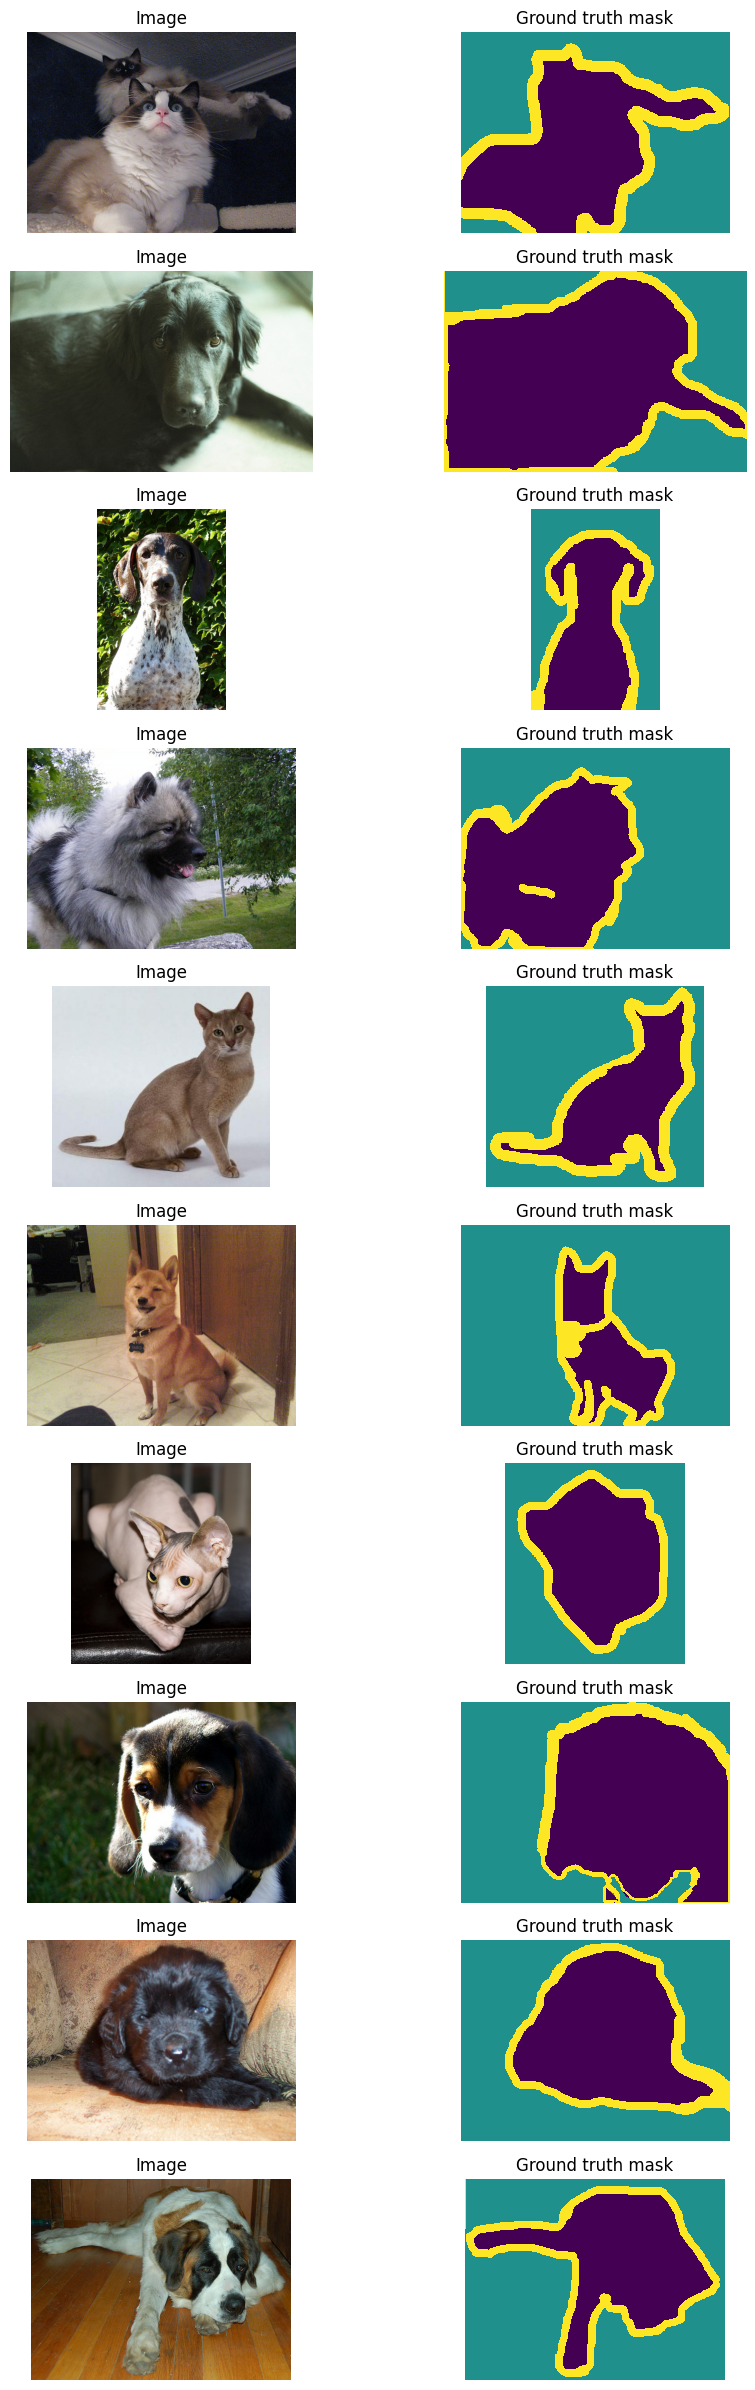

In [26]:
display_image_grid(train_images_filenames[:10], images_directory, masks_directory)

In [27]:
#Data Augmentation
example_image_filename = train_images_filenames[10]
image = plt.imread(os.path.join(images_directory, f'{example_image_filename}.jpg'))

resized_image = A.resize(image, height=256, width=256)
padded_image = A.pad(image, min_height=512, min_width=512)
padded_constant_image = A.pad(image, min_height=512, min_width=512, border_mode=cv2.BORDER_CONSTANT)
cropped_image = A.center_crop(image, crop_height=256, crop_width=256)

Text(0.5, 1.0, 'Original image')

Text(0.5, 1.0, 'Resized image')

Text(0.5, 1.0, 'Cropped image')

Text(0.5, 1.0, 'Image padded with reflection')

Text(0.5, 1.0, 'Image padded with constant padding')

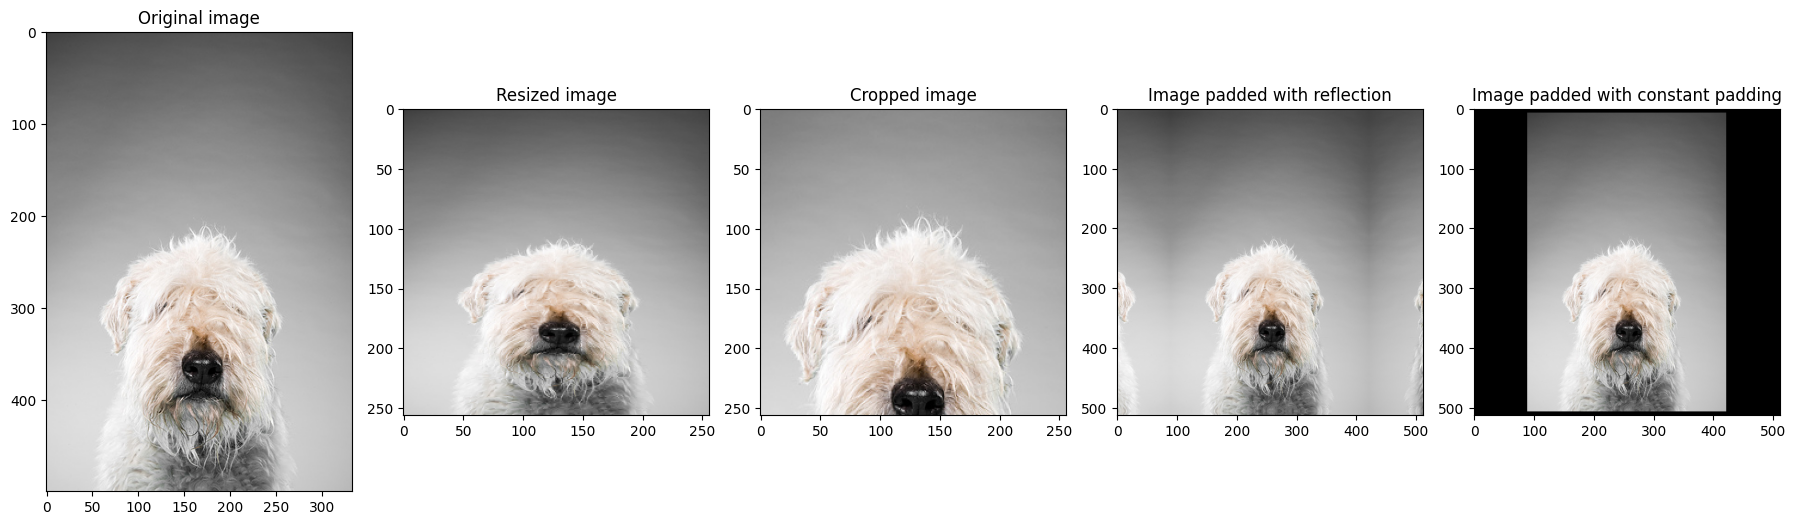

In [28]:
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"
figure, ax = plt.subplots(nrows=1, ncols=5, figsize=(18, 10))
ax.ravel()[0].imshow(image)
ax.ravel()[0].set_title("Original image")
ax.ravel()[1].imshow(resized_image)
ax.ravel()[1].set_title("Resized image")
ax.ravel()[2].imshow(cropped_image)
ax.ravel()[2].set_title("Cropped image")
ax.ravel()[3].imshow(padded_image)
ax.ravel()[3].set_title("Image padded with reflection")
ax.ravel()[4].imshow(padded_constant_image)
ax.ravel()[4].set_title("Image padded with constant padding")
plt.tight_layout()
plt.show()

In [29]:
#train_images_filenames = train_images_filenames.apply(lambda x:x + '.jpg')
#val_images_filenames = val_images_filenames.apply(lambda x:x + '.jpg')
from PIL import Image 

class OxfordPetDataset(Dataset):
    def __init__(self, images_filenames, images_directory, masks_directory, transform=None, transform_mask=None):
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.masks_directory = masks_directory
        self.transform = transform
        self.transform_mask = transform_mask

    def __len__(self):
        return len(self.images_filenames)

    def __getitem__(self, idx):
        image_filename = self.images_filenames.loc[idx] + '.jpg' 
        image = Image.open(os.path.join(self.images_directory, image_filename)).convert('RGB')
        mask = Image.open(
            os.path.join(self.masks_directory, image_filename.replace(".jpg", ".png")))
        #mask = preprocess_mask(mask)
        if self.transform is not None:
            transformed = self.transform(image)
            transformed_m = self.transform_mask(mask)
            image = transformed
            mask = transformed_m
        return image, mask

In [30]:
#For Training Data
train_transform = transforms.Compose([transforms.Resize((256, 256)),
                                transforms.ToTensor(), # [0, 255] -> [0.0, 1.0]
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) #(pixel-mean)/std => [0.0, 1.0] ->  [-1.0, 1.0] 
#For Class Label Image: Label images are used in segmentation tasks to indicate the class of the object to which each pixel belongs.
target_transform = transforms.Compose([transforms.PILToTensor(),  #Maintains the original pixel value range  
                                       transforms.Resize((256, 256)),   
                                       # Start Class Label from 0, Dimention Reduction, Label Data Type Change  
                                       transforms.Lambda(lambda x: (x-1).squeeze().type(torch.LongTensor)) ])

Compose(
    PILToTensor()
    Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
    Lambda()
)

In [31]:
train_dataset = OxfordPetDataset(train_images_filenames, 
                                 images_directory, 
                                 masks_directory, 
                                 transform=train_transform, 
                                 transform_mask=target_transform)


val_dataset = OxfordPetDataset(val_images_filenames,
                               images_directory,
                               masks_directory,
                               transform=train_transform,
                               transform_mask=target_transform)

#### LinkNet
- https://arxiv.org/pdf/1707.03718.pdf

- LinkNet is a type of Convolutional Neural Network (CNN) designed specifically for efficient semantic segmentation tasks.
    - Semantic segmentation involves assigning a class label (e.g., "dog", "cat", "background") to every pixel in an image. This is more detailed than object detection (which just puts boxes around objects).
    - The **Encoder** extracts important features from the image, and the **Decoder** uses these features to generate detailed pixel-level predictions. **Skip connections** allow for the direct transmission of important feature information from the Encoder to the Decoder block. During this process, direct connections from the Encoder to the Decoder minimize the loss of crucial information, enabling efficient segmentation.

<div>
<img src="nlp_images/linknet_arch.png" width=400>
<img src="nlp_images/linknet_encode.png" width=300>
<img src="nlp_images/linknet_decoder.png" width=300>
</div>

- conv ([3x3], (n, n)): This indicates a convolutional layer with 3x3 kernel size. The notation (n, n) implies that the number of input channels and the number of output channels are both n
- conv (1x1), (m/4, n): This represents a convolutional layer with a 1x1 kernel size. The notation (m/4, n) implies that the number of channels is redueced from n to m/4.

##### Stride
    - Stride refers to the interval at which the filter (kernel) moves across the input data during convolutional or transpose convolutional (deconvolution) operations. For example, when the stride is set to 2, the filter moves two pixels at a time.
    - The primary reason for setting the stride is to adjust the spatial size of the input data.
    - In convolutional operations, increasing the stride reduces the spatial size of the output (downsampling). 
    - In transpose convolutional operations, increasing the stride increases the spatial size of the output (upsampling).

In [88]:
from torchvision.models import resnet

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, n_filters):
        super().__init__()
        # Feature channels represent specific features in the image, 
        # and the entire feature map is composed of a collection of these channels.
        # input: in_channels & output:in_channels // 4 & 1: 1x1 kernel
        # B, C, H, W -> B, C/4, H, W
        self.conv1 = nn.Conv2d(in_channels, in_channels // 4, 1)
        # defining a batch normalization layer for CNN
        # if in_channels is 64, in_channels // 4 would be 16, 
        # meaning the batch normalization layer is expecting an input with 16 feature channels.
        self.norm1 = nn.BatchNorm2d(in_channels // 4)
        self.relu1 = nn.ReLU(inplace=True)

        # B, C/4, H, W -> B, C/4, H, W
        # padding=1:a one-pixel thick layer of zeros is added to the edges of the input
        # output_padding=1: additional padding to the output data.
        self.deconv2 = nn.ConvTranspose2d(in_channels // 4, in_channels // 4, 3,
                                          stride=2, padding=1, output_padding=1)
        self.norm2 = nn.BatchNorm2d(in_channels // 4)
        self.relu2 = nn.ReLU(inplace=True)

        # B, C/4, H, W -> B, C, H, W
        self.conv3 = nn.Conv2d(in_channels // 4, n_filters, 1)
        self.norm3 = nn.BatchNorm2d(n_filters)
        self.relu3 = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.norm1(x)
        x = self.relu1(x)
        x = self.deconv2(x)
        x = self.norm2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.norm3(x)
        x = self.relu3(x)
        return x


class LinkNet(nn.Module):
    def __init__(self, num_classes, num_channels=3, encoder='resnet34'):
        super().__init__()
        assert encoder in ['resnet18', 'resnet34']
        
        filters = [64, 128, 256, 512]
        # Encoder
        res = resnet.resnet34(pretrained=True) #Loads a pretrained ResNet34 model.
        #pretrained=True means the model is initialized with weights that have been pretrained. 
        
        #initial layers of ResNet34-extract the first set of features from the input image
        self.firstconv = res.conv1
        self.firstbn = res.bn1
        self.firstrelu = res.relu
        self.firstmaxpool = res.maxpool
        # layer groups in ResNet34 - encode the image's features 
        self.encoder1 = res.layer1
        self.encoder2 = res.layer2
        self.encoder3 = res.layer3
        self.encoder4 = res.layer4

        # Decoder: Each block performs upsampling to increase the size of the feature map.
        # DecoderBlock: gradually restores the size of the feature map to the original image size.
        self.decoder4 = DecoderBlock(filters[3], filters[2]) # input: filters[3] & output: filters[2]
        self.decoder3 = DecoderBlock(filters[2], filters[1])
        self.decoder2 = DecoderBlock(filters[1], filters[0])
        self.decoder1 = DecoderBlock(filters[0], filters[0])

        # Final Classifier: generate the final segmentation map
        # The segmentation map has the same spatial size as the input image and predicts the class of each pixel.
        self.finaldeconv1 = nn.ConvTranspose2d(filters[0], 32, 3,
                                               stride=2)
        self.finalrelu1 = nn.ReLU(inplace=True)
        self.finalconv2 = nn.Conv2d(32, 32, 3)
        self.finalrelu2 = nn.ReLU(inplace=True)
        self.finalconv3 = nn.Conv2d(32, num_classes, 2, padding=1)

    def forward(self, x):
        # Encoder
        x = self.firstconv(x)
        print(x.shape)
        x = self.firstbn(x)
        x = self.firstrelu(x)
        x = self.firstmaxpool(x)
        e1 = self.encoder1(x)
        e2 = self.encoder2(e1)
        e3 = self.encoder3(e2)
        e4 = self.encoder4(e3)

        # Decoder with Skip Connections
        d4 = self.decoder4(e4) + e3
        d3 = self.decoder3(d4) + e2
        d2 = self.decoder2(d3) + e1
        d1 = self.decoder1(d2)

        # Final Classification
        x = self.finaldeconv1(d1)
        x = self.finalrelu1(x)
        x = self.finalconv2(x)
        x = self.finalrelu2(x)
        x = self.finalconv3(x)
        return x

In [71]:
torch.cuda.is_available()

False

In [76]:
#creates a DataLoader
params = {
    "device": "cuda",
    "lr": 0.001,
    "batch_size": 32,
    "num_workers": 2,
    "epochs": 15,
}

train_loader = DataLoader(
    train_dataset,
    batch_size=params["batch_size"],
    shuffle=True,
    num_workers=params["num_workers"],
    pin_memory=False,
)
val_loader = DataLoader(
    val_dataset,
    batch_size=params["batch_size"],
    shuffle=True,
    num_workers=params["num_workers"],
    pin_memory=False,
)

In [77]:
def create_model(params):
    model = LinkNet(3) # the number of input channels = 3
    model = model.to(params["device"])
    return model

from torchmetrics.functional import dice

def fit(model, train_dataset, val_dataset, params):
    torch.cuda.empty_cache()
    criterion = nn.CrossEntropyLoss().to(params['device'])
    optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])

In [78]:
model = create_model(params)
history = fit(model, train_loader, val_loader, params)

AssertionError: Torch not compiled with CUDA enabled

In [89]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchmetrics.functional import dice

params = {
    "device": "cpu",
    "lr": 0.001,
    "batch_size": 32,
    "num_workers": 0,
    "epochs": 15,
}

# DataLoader 
train_loader = DataLoader(
    train_dataset,
    batch_size=params["batch_size"],
    shuffle=True,
    num_workers=params["num_workers"],
    pin_memory=False,
)

val_loader = DataLoader(
    val_dataset,
    batch_size=params["batch_size"],
    shuffle=False,  
    num_workers=params["num_workers"],
    pin_memory=False,
)

def create_model(params):
    model = LinkNet(3)  #RGB
    model = model.to(params["device"])
    return model

def fit(model, train_loader, val_loader, params):
    criterion = nn.CrossEntropyLoss().to(params['device'])
    optimizer = torch.optim.Adam(model.parameters(), lr=params["lr"])
    
    for epoch in range(params["epochs"]):
        model.train()  
        train_loss, val_loss = 0.0, 0.0

        for batch in train_loader:
            inputs, targets = batch
            inputs, targets = inputs.to(params["device"]), targets.to(params["device"])
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        model.eval()  
        with torch.no_grad():
            for batch in val_loader:
                inputs, targets = batch
                inputs, targets = inputs.to(params["device"]), targets.to(params["device"])
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
        
        print(f'Epoch {epoch+1}, Train Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}')

model = create_model(params)
history = fit(model, train_loader, val_loader, params)
history

c:\Users\alice\Documents\NLP\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alice\Documents\NLP\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Size([32, 64, 128, 128])
torch.Si

In [81]:
class OxfordPetInferenceDataset(Dataset):
    def __init__(self, images_filenames, images_directory, transform=None):
        self.images_filenames = images_filenames
        self.images_directory = images_directory
        self.transform = transform

    def __len__(self):
        return len(self.images_filenames)

    def __getitem__(self, idx):
        image_filename = self.images_filenames[idx] + '.jpg'
        image = cv2.imread(os.path.join(self.images_directory, image_filename))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        original_size = tuple(image.shape[:2]) #h, w from (h, w, C)
        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]
        return image, original_size

In [82]:
#Albumentations Library
test_transform = A.Compose(
    [A.Resize(256, 256), A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)), ToTensorV2()]
)
test_dataset = OxfordPetInferenceDataset(test_images_filenames, images_directory, transform=test_transform,)

In [83]:
def predict(model, params, test_dataset, batch_size):
    test_loader = DataLoader(
        test_dataset, batch_size=batch_size, shuffle=False, num_workers=params["num_workers"], pin_memory=True,
    )
    model.eval()
    predictions = []
    with torch.no_grad():
        for images, (original_heights, original_widths) in test_loader:
            images = images.to(params["device"], non_blocking=True) #parallel computation
            output = model(images).squeeze()
            _, predicted_masks = torch.max(output, 1)
            predicted_masks = predicted_masks.cpu().numpy()
            for predicted_mask, original_height, original_width in zip(
                predicted_masks, original_heights.numpy(), original_widths.numpy()
            ):
                predictions.append((predicted_mask, original_height, original_width))
    return predictions

In [84]:
predictions = predict(model, params, test_dataset, batch_size=16)

[(array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [2, 2, 1, ..., 1, 1, 1],
         [2, 2, 1, ..., 1, 1, 1],
         [2, 2, 1, ..., 1, 1, 1]], dtype=int64),
  441,
  500),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=int64),
  500,
  375),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=int64),
  320,
  198),
 (array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1]], dtype=int64),
  335,
  500),
 (array(

In [85]:
predicted_masks = []
for predicted_256x256_mask, original_height, original_width in predictions:
    full_sized_mask = A.resize(
        predicted_256x256_mask, height=original_height, width=original_width, interpolation=cv2.INTER_NEAREST)
    predicted_masks.append(full_sized_mask)

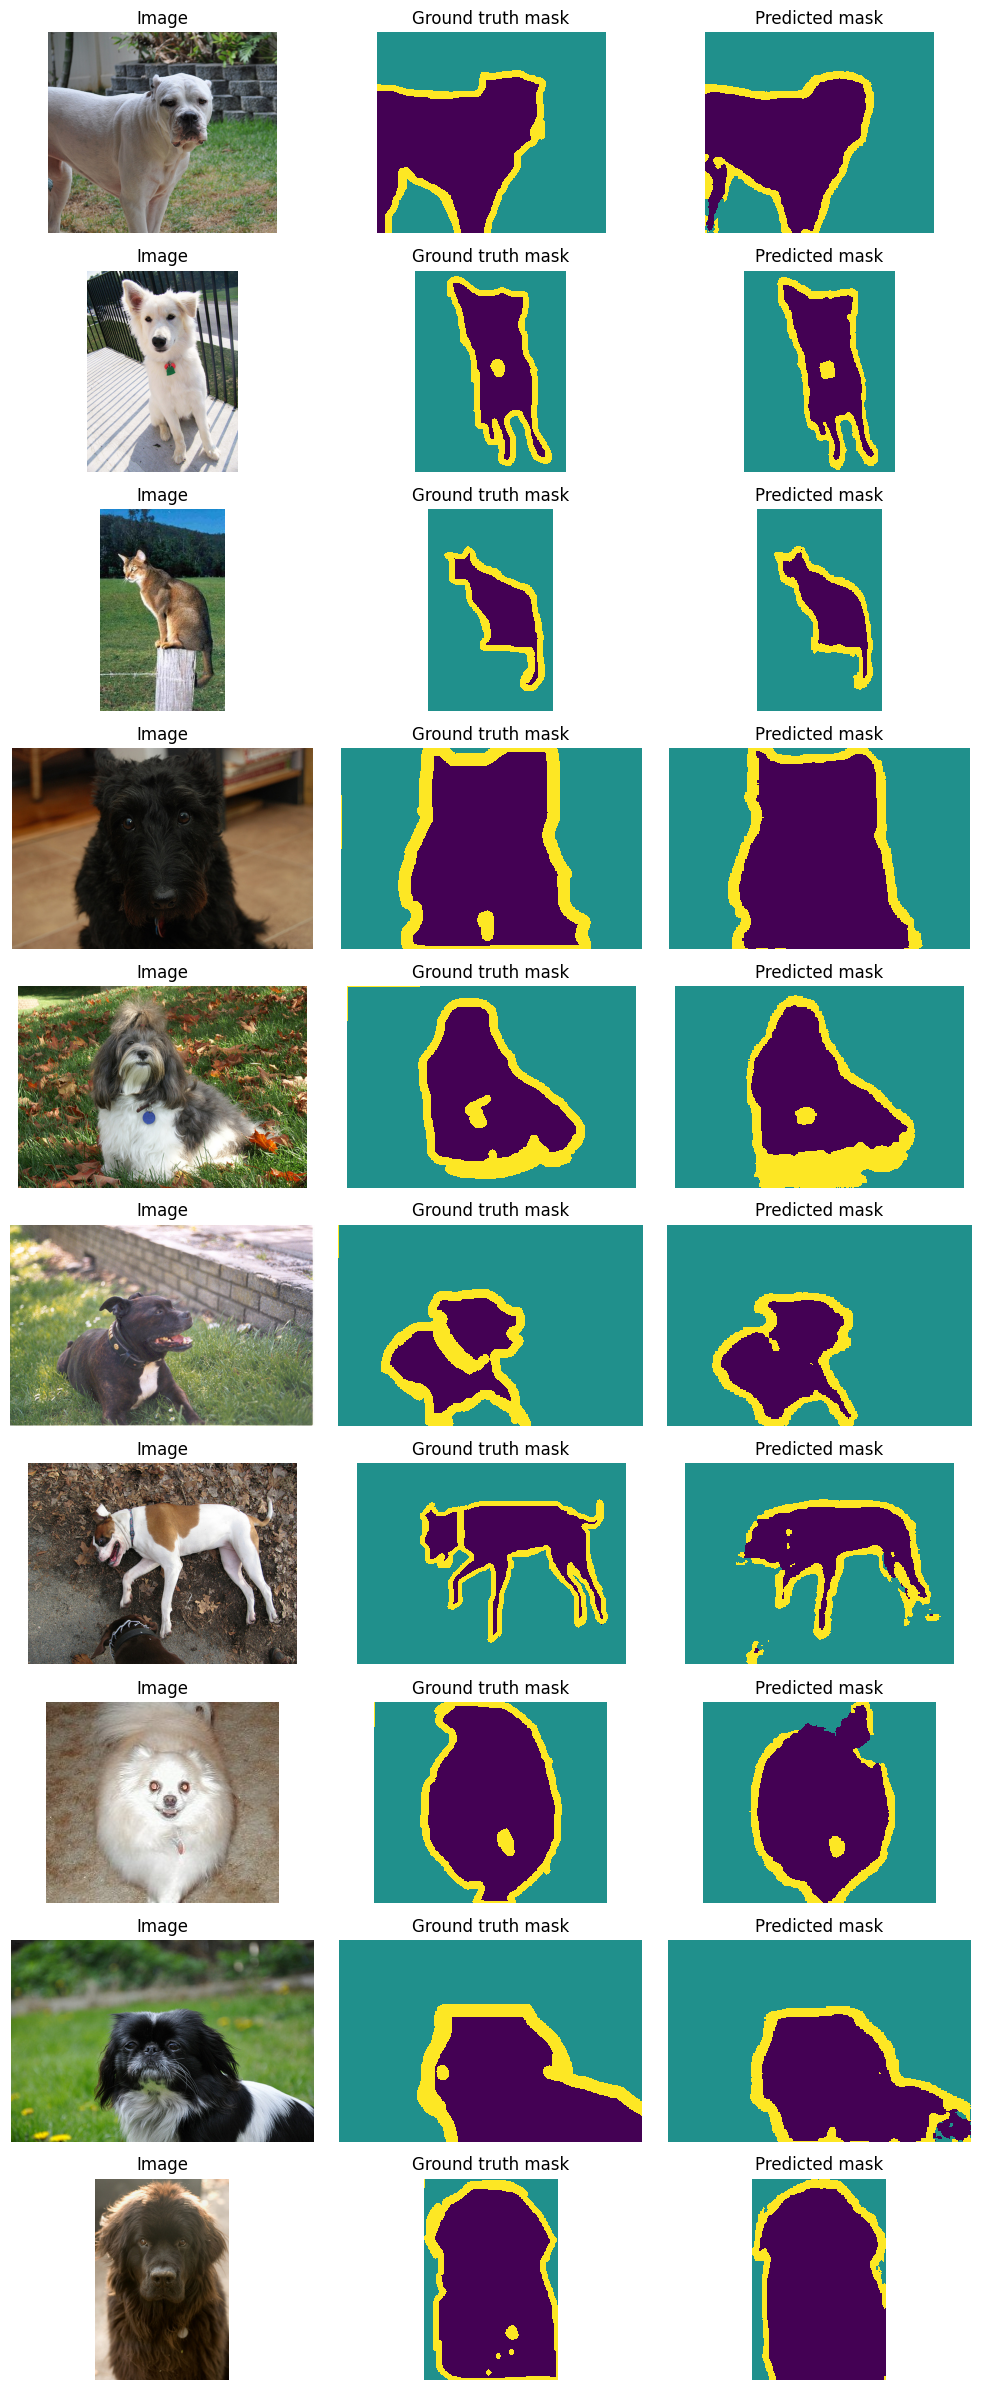

In [86]:
display_image_grid(test_images_filenames[:10], images_directory, masks_directory, predicted_masks=predicted_masks)